Non-Local Means (NLM)

In [ ]:
from IPython.display import Image, display

Downloaded http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png


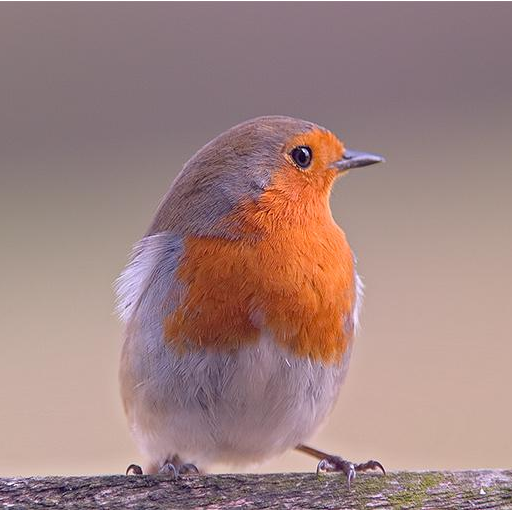

In [2]:
# Descargar imagen por defecto
%run download_default_image.ipynb

## Usage y opciones generales
Comprobamos los argumentos principales del script.

In [10]:
!python ../src/NLM.py -h

usage: NLM.py [-h] [-g] {encode,decode} ...

Filter's common interface.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Compress data
    decode         Uncompress data

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


## Opciones de codificación

In [11]:
!python ../src/NLM.py encode -h

usage: NLM.py encode [-h] [-c ENTROPY_IMAGE_CODEC]

options:
  -h, --help            show this help message and exit
  -c ENTROPY_IMAGE_CODEC, --entropy_image_codec ENTROPY_IMAGE_CODEC
                        Entropy Image Codec (default: TIFF)


## Opciones de decodificación
Aquí se puede observar el parámetro `-s` correspondiente al tamaño/fuerza del filtro NLM.

In [14]:
!python ../src/NLM.py decode -h

usage: NLM.py decode [-h] [-c ENTROPY_IMAGE_CODEC]

options:
  -h, --help            show this help message and exit
  -c ENTROPY_IMAGE_CODEC, --entropy_image_codec ENTROPY_IMAGE_CODEC
                        Entropy Image Codec (default: TIFF)


In [21]:
%%bash
# Codificación
python ../src/NLM.py encode -i /tmp/original.png -o /tmp/original.nlm

# Decodificación aplicando el filtro NLM con fuerza 10
python ../src/NLM.py decode -i /tmp/original.nlm -o /tmp/decoded.png -f NLM -s 8

main Namespace(debug=False, subparser_name='encode', entropy_image_codec='TIFF', original='/tmp/original.nlm', encoded='/tmp/encoded', func=<function encode at 0x75670710cc20>)


(INFO) entropy_image_coding: Written 275514 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='decode', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', filter_size=8, func=<function decode at 0x7f5a97f20360>)


(INFO) NLM: Aplicando NLM: h=8, parche=7, ventana=21


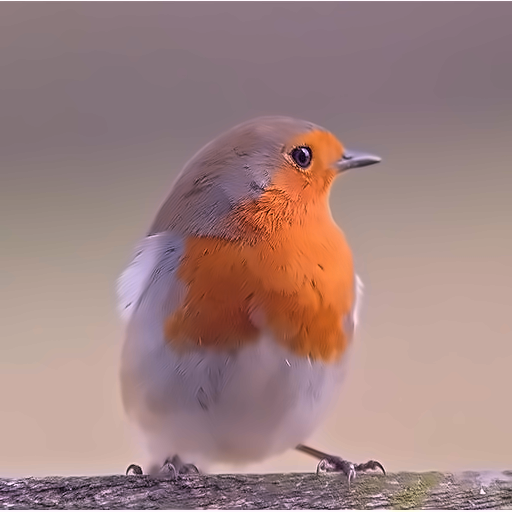

In [22]:
from IPython.display import Image, display
display(Image(filename="/tmp/decoded.png"))

In [17]:
%%bash
python ../src/RDE.py

Code-stream file: /tmp/encoded.tif length: 275514
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif'] 275514 bytes (8.41) bits/pixel
Decoded image: /tmp/decoded.png 152675 bytes (4.66) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 6.38
J = R + D = 14.78


In [18]:
%%bash
rm /tmp/encoded*